# Introdction to Covid 19

![COVID-19](https://www.pharmaceutical-technology.com/wp-content/uploads/sites/10/2020/02/Coronavirus-in-India.jpg)


source: [https://www.pharmaceutical-technology.com/features/coronavirus-affected-countries-india-measures-impact-pharma-economy/](http://)

**Overview**

*Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell.*



source :[https://www.google.com/intl/en_in/covid19/](http://)

**How it spreads**



Coronavirus disease spreads primarily through contact with an infected person when they cough or sneeze. It also spreads when a person touches a surface or object that has the virus on it, then touches their eyes, nose, or mouth.


source :[https://www.google.com/intl/en_in/covid19/](http://)

**SYMPTOMS**

People may be sick with the virus for 1 to 14 days before developing symptoms. 
The most common symptoms of coronavirus disease (COVID-19) are fever, tiredness, and dry cough.
Most people (about 80%) recover from the disease without needing special treatment.
More rarely, the disease can be serious and even fatal. Older people, and
people with other medical conditions (such as asthma, diabetes, or heart disease), 
may be more vulnerable to becoming severely ill.


 People may experience:
* cough
* fever
* tiredness
* difficulty breathing (severe cases)



source :[https://www.google.com/intl/en_in/covid19/](http://)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# essential libraries
import math
import random
from datetime import timedelta

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import folium

# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# for offline ploting
# ===================
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [4]:
world_tdar = pd.read_csv('2019_nCoV_data.csv', parse_dates=['Date'])
symp = pd.read_csv('Cleaned-Data.csv')
india_tdar = pd.read_csv('complete.csv', parse_dates=['Date'])
world_tconf = pd.read_csv('covid_19_data.csv', parse_dates=['ObservationDate'])
itly_tpositive = pd.read_csv('covid19_italy_province.csv', parse_dates=['Date'])

world_tconf_lat_lon = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
world_country_date = pd.read_csv('COVID_Data.csv', parse_dates=['Date'])
india_state_conf = pd.read_csv('covid_india.csv')
india_date_conf = pd.read_csv('covid_19_india.csv', parse_dates=['Date'])
india_hospital_bed = pd.read_csv('HospitalBedsIndia.csv')
india_testing = pd.read_csv('ICMRTestingDetails.csv', parse_dates=['DateTime'])
india_testing_lab = pd.read_csv('ICMRTestingLabs.csv')
india_popul = pd.read_csv('population_india_census2011.csv')
india_state_test = pd.read_csv('StatewiseTestingDetails.csv', parse_dates=['Date'])
us_covid = pd.read_csv('us_states_covid19_daily.csv', parse_dates=['date'])
world_lock = pd.read_csv('countryLockdowndatesJHUMatch.csv', parse_dates=['Date'])


# **Growth of Corona Virus**

A 55-year-old individual from Hubei province in China may have been the first person to have contracted COVID-19, the disease caused by the new coronavirus spreading across the globe. That case dates back to Nov. 17, 2019, according to the South Morning China Post.

That's more than a month earlier than doctors noted cases in Wuhan, China, which is in Hubei province, at the end of December 2019. At the time, authorities suspected the virus stemmed from something sold at a wet market in the city. However, it's now clear that early in what is now a pandemic, some infected people had no connection to the market. That included one of the earliest cases from Dec. 1, 2019 in an individual who had no link to that seafood market, researchers reported Jan. 20 in the journal The Lancet.

Scientists now suspect this coronavirus, SARS-CoV-2, originated in a bat and somehow hopped to another animal, possibly the pangolin, which then passed it on to humans. The disease is now spreading between people without any animal intermediary.


Nov. 17 case, about one to five new cases were reported every day and by Dec. 15, the total infections reached 27. Daily cases seem to have increased after that, with the case count reaching 60 by Dec. 20, the SCMP reported.


On Dec. 27, Dr. Zhang Jixian, head of the respiratory department at Hubei Provincial Hospital, reported to health officials in China that a novel coronavirus was causing the disease; by that day, it had infected more than 180 individuals. (Doctors may not have been aware of all of those cases at the time, but only identified those cases after going back over the records, the Morning Post reported.)


As of April 1, there were nearly 1,515,883 cases globally , with cases on every continent except Antarctica.


Source:[https://www.livescience.com/first-case-coronavirus-found.html](http://)



# * ****Growth Factor of Daily New Cases****


Growth factor is the factor by which a quantity multiplies itself over time. The formula used is every day's new cases / new cases on the previous day. For example, a quantity growing by 7% every period (in this case daily) has a growth factor of 1.07.

A growth factor above 1 indicates an increase, whereas one which remains between 0 and 1 it is a sign of decline, with the quantity eventually becoming zero, whereas a growth factor constantly above 1 could signal exponential growth

In [5]:
temp = world_tdar.groupby('Date')['Recovered', 'Deaths', 'Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600,
             title='World Wide Corono Case over time', color_discrete_sequence = ['#636EFA', '#EF553B', '#00CC96'])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

# Growth rate Over Time (Worldwide)




From the above graph we can clearly observe that the rate of growth of the virus in early stage is very slow. Gradully when its start spreading the growth rate increase exponentially. This is a clear sign of a pandamic.

# Entry of Corona Virus In INDIA

On 30 January, the first case was confirmed in Kerala's Thrissur district in a student who had returned home for a vacation from Wuhan University in China

On 2 February, the second case was reported in Kerala's Alappuzha district in a student who had returned from Wuhan, China.
On 3 February, the third case was reported in Kerala's Kasaragod district in a student who had returned from Wuhan, China.


Novel Coronavirus or Covid-19 cases in India have shot up in the last couple of days and is now close to the 11,500-mark. According to latest figures from the Ministry of Health, there are 11,439 confirmed COVID-19 cases as of April 15, of which 1306 have been cured and discharged. 377 people have succumbed to the disease in India.

Prime Minister Narendra Modi, on April 14th, extended the previously announced 21-day complete lockdown by another 19 days, now slated to end on May 3rd.

Sourcse:[https://economictimes.indiatimes.com/news/politics-and-nation/coronavirus-crisis-heres-total-number-of-confirmed-cases-in-india-as-per-health-ministry/articleshow/74589499.cms](http://)

We can conclude that in India the corona virus start spreading beacus of the forigners and that it started spreading due to community transfer. Most of the cases in India starts with a person who had recently visited outside India. 

In [6]:
temp = india_tdar.groupby('Date')['Death', 'Total Confirmed cases'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Death', 'Total Confirmed cases'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600,
             title='Cases over time in India', color_discrete_sequence = [ '#EF553B', '#00CC96'])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

# Growth rate over time (INDIA)

In the above graph we can observe that till 22 March there vere very few cases in India. After 23 march the cases increses. On 23 March the country was lockdown but the commuinty transer was alredy happed. So the no of new cases increases exponentially like the Wourldwide. This exponential growth started incresing the problems as the no of resources are limited. So the Social-Distancing started in India to stop the chain of growth.

In [8]:
import plotly.graph_objs as go
import folium
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
from plotly.offline import init_notebook_mode, iplot 
import plotly.offline as py
import plotly.express as ex
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("seaborn-talk")
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'
#from fbprophet import Prophet
pd.set_option('display.max_rows', None)
from math import sin, cos, sqrt, atan2, radians
import numpy as np 
import pandas as pd 
import os
from IPython.display import Markdown
from datetime import timedelta
import json, requests
from datetime import datetime
import glob
import requests 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Worldwide Total no of Corona Virus patient

In [9]:
#Overall 

fig = go.Figure(data=[go.Pie(labels=['Active Cases','Cured','Death'],
                             values= [1484234,552771,146872],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#33ccff', '#00e68a','#ff3300'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='Current Situation in World according to "Worldometer, www.worldometer.info"',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

# Total Corona patient in India

In [10]:
#Overall 

fig = go.Figure(data=[go.Pie(labels=['Active Cases','Cured','Death'],
                             values= [11214,1768,448],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#263fa3', '#2fcc41','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='Current Situation in India according to "Ministry Of Health and Family Welfare , India"',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [11]:
import plotly.io as pio

In [12]:
temp1 = world_country_date.groupby('Country')['Death', 'Confirmed'].sum().reset_index()
temp1 = temp1.melt(id_vars="Country", value_vars=['Death', 'Confirmed'],
                 var_name='Case', value_name='Count')


# Top countries affected due to corona

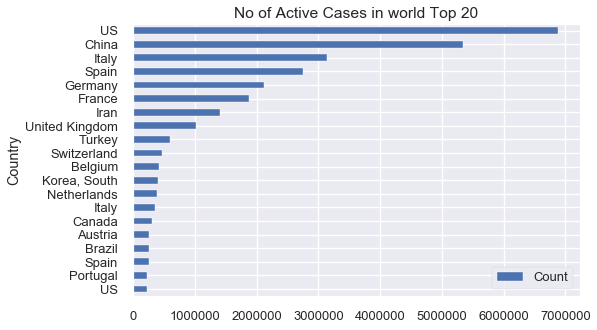

In [13]:


#create barplot
se = temp1[['Country', 'Count']].sort_values(by = "Count", ascending = False).set_index("Country")
se = se[0:20].sort_values(by = "Count", ascending = True)
se.plot.barh()
plt.title("No of Active Cases in world Top 20")
plt.xticks(rotation=0);

In [14]:
temp2 = india_tdar.groupby('Name of State / UT')['Death', 'Total Confirmed cases'].sum().reset_index()
temp2 = temp2.melt(id_vars="Name of State / UT", value_vars=['Death', 'Total Confirmed cases'],
                 var_name='Case', value_name='Count')


# Top 20 Indian states affected due to corona

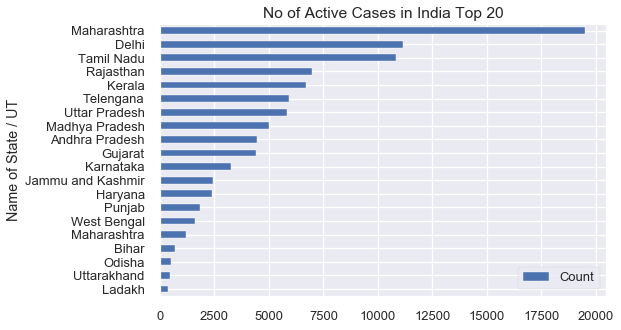

In [15]:
#create barplot
se = temp2[['Name of State / UT', 'Count']].sort_values(by = "Count", ascending = False).set_index("Name of State / UT")
se = se[0:20].sort_values(by = "Count", ascending = True)
se.plot.barh()
plt.title("No of Active Cases in India Top 20")
plt.xticks(rotation=0);

In [16]:
a1=([['13/03/20', 6500, 78],
       ['18/03/20', 13125, 150],
       ['19/03/20', 14175, 182],
       ['20/03/20', 15404, 236],
       ['21/03/20', 16911, 315],
       ['22/03/20', 18127, 396],
       ['23/03/20', 20707, 471],
       ['24/03/20', 22694, 536],
       ['25/03/20', 25144, 581],
       ['27/03/20', 27688, 691],
       ['30/03/20', 38442, 1334],
       ['31/03/20', 42788, 1533],
       ['01/04/20', 47951, 1637],
       ['02/04/20', 55851, 2056],
       ['03/04/20', 69245, 2653],
       ['04/04/20', 79950, 3113],
       ['05/04/20', 89534, 3554],
       ['06/04/20', 101068, 4135],
       ['07/04/20', 114015, 4616],
       ['08/04/20', 127919, 5114],
       ['09/04/20', 144910, 5705],
       ['10/04/20', 161330, 6872],
       ['11/04/20', 179374, 7703],
       ['12/04/20', 195748, 8312],
       ['13/04/20', 217554, 9341],
       ['14/04/20', 244893, 10307],
       ['15/04/20', 274599, 11297],
       ['16/04/20', 302956, 12581]]
      )

In [17]:
posi = pd.DataFrame(data=a1, columns=["Date", "tested","positive"])

# Testing in India

India has more than 12,000 confirmed cases of COVID-19, a number that is rising steadily by the day. Experts say that ramping up testing is key because India has been criticized so far for conducting far fewer tests compared to other countries. As of April 15, it had conducted 274,599 tests compared to the U.S., which is conducting 100,000 tests per day.

The testing situation was compounded earlier this month when the Supreme Court of India ordered on April 8 that private labs should offer COVID-19 tests for free. It later clarified on April 13 that patients who can afford the test (4,500 rupees or $60  in private labs) should pay and free testing (done by government labs) should be only for the poor.

India’s top medical body, the Indian Council of Medical Research (ICMR), has granted approvals for two types of testing kits. One is the real-time polymerase chain reaction (RT-PCR) test, which is conducted in a lab and requires nasal and throat swabs. This is a confirmatory molecular test and takes six to eight hours for results to be processed.

The second type of test is a rapid antibody test, which is essentially a blood test for detecting COVID-19 antibodies. The results can be obtained in 30 minutes. Though it is not conclusive, ICMR has said that it could be used for cluster-based testing in government-designated hotspots.

Source:[https://www.forbes.com/sites/anuraghunathan/2020/04/16/india-ramps-up-coronavirus-testing-approves-slew-of-local-and-foreign-makers/#30a3322069a5](http://)

![COVID-19](https://www.thehindubusinessline.com/economy/x00j51/article30694656.ece/alternates/LANDSCAPE_435/bl31coronaviruspix)

In [18]:
fig = go.Figure(data=[
go.Bar(name='Tested', x=posi['Date'], y=posi['tested'],marker_color='#3399ff'),
go.Bar(name='Positive', x=posi['Date'], y=posi['positive'],marker_color='#FF0000')])
fig.update_layout(barmode='stack',width=800, height=500)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(title_text='Number of people tested and positive among them',
                  plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [19]:
india_hospital_bed=india_hospital_bed.rename(columns={"State/UT":"state","TotalPublicHealthFacilities_HMIS":"total_hospital","NumPublicBeds_HMIS":"total_bed"})

In [20]:
x1=india_hospital_bed.state.copy()
x2=india_hospital_bed.total_hospital.copy()
x3=india_hospital_bed.total_bed.copy()

# Number of Hospitals in different parts of India

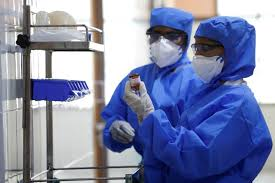

India, which has a population of 1.3 billion, wants to preempt such a situation from developing. Its fragile healthcare infrastructure will not be able to cope with such an outbreak.

So, the government decided on a two-pronged strategy: lock down the entire nation to break the infection chain and quickly ramp up its tattered healthcare facilities to face the pandemic.

Every Indian state today has similar priorities: add new beds, increase capacity of intensive care units, requisition portions of private hospitals, order lifesaving ventilators, recruit medical practitioners on contract, weigh in on extending services of retiring doctors and nurses and earmark select government hospitals for Covid-19 patients.

Read more at:
https://economictimes.indiatimes.com/news/politics-and-nation/coronavirus-can-india-ramp-up-its-health-infrastructure-swiftly-to-contain-this-pandemic/articleshow/74866036.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

In [21]:
#Overall 

fig = go.Figure(data=[go.Pie(labels=['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'],
                             values= [ 34,  1666,   199,  1220,  2146,    47,  1023,    13,     8,
         615,    40,  2236,   683,   671,   818,   558,  2943,  1297,
          10,  1867,  3239,   114,   180,    87,   166,  1799,    53,
         742,  3139,    32,  2581,   932,   157,  4122,   383,  1905],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#263fa3', '#2fcc41','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='Number of Hospitals  in India ',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

# No of hospital beds in India

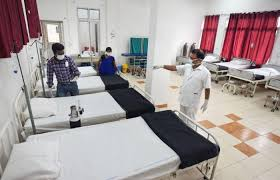

In [22]:
fig = go.Figure(data=[go.Pie(labels=['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'],
                             values= [ 1246,  60799,   2320,  19115,  17796,   3756,  14354,    568,
          298,  20572,   2666,  41129,  13841,   8706,  11342,   7404,
        56333,  39511,    250,  38140,  68998,   2562,   4585,   2312,
         1944,  16497,   4462,  13527,  51844,   1145,  72616,  17358,
         4895,  58310,   6660,  51163],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#263fa3', '#2fcc41','#cc3c2f'], line=dict(color='#FFFFFF', width=.5)))
fig.update_layout(title_text='Number of Hospitals beds in India ',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [23]:
india_state_conf = india_state_conf.rename(columns={"Name of State / UT":"state","Total Confirmed cases (Including 76 foreign Nationals)":"total_confm"})

# State wise current active cases in India

In [24]:
#Overall 

fig = go.Figure(data=[go.Pie(labels=['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland#', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana', 'Tripura',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal'],
                             values= [11,  525,    1,   33,   70,   21,   33, 1578,    7,  766,  205,
         35,  300,   28,  279,  388,   17,  987, 2916,    2,    7,    1,
          0,   60,    7,  186, 1023, 1242,  647,    2,   37,  735,  231],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#263fa3', '#2fcc41','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='Current active case in India ',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

# Compareing no pf active patients with avalabel resourses

In [25]:
import plotly.graph_objects as go

state = ['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland#', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana', 'Tripura',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=state,
    y=[11,  525,    1,   33,   70,   21,   33, 1578,    7,  766,  205,
         35,  300,   28,  279,  388,   17,  987, 2916,    2,    7,    1,
          0,   60,    7,  186, 1023, 1242,  647,    2,   37,  735,  231],
    name='positive cases',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=state,
    y=[ 34,  1666,   199,  1220,  2146,    47,  1023,    
         615,    40,  2236,   683,   671,   818,   558,  2943,  1297,
          10,  1867,  3239,   114,   180,    87,   166,  1799,    53,
         742,  3139, 2581,   932,   157,   383, 4122,    1905],
    name='no of hospitals',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

# Comparision between active patients and population density of the country

In [26]:
import plotly.graph_objects as go

state = ['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana', 'Tripura',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=state,
    y=[11,  525,    1,   33,   70,   21,   33, 1578,    7,  766,  205,
         35,  300,   28,  279,  388,   17,  987, 2916,    2,    7,    1,
          0,   60,    7,  186, 1023, 1242,  647,    2,   37,  735,  231],
    name='Active Cases',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=state,
    y=[46,303,17,397,1102,9252,189,11297,394,308,573,123,98,414,319,859,28,236,365,122,132,52,119,269,2598,550,201,555,312,350,189,828,1029],
    name='Population Density-Km2',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

By studying above barcart we can observe that the region with high density have larger no of corona active cases. This is beacuse the high density is the reson for social gathering. Community spread can easly happen in highly density area.

In [27]:
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates = ['Date'])

In [28]:
df.isnull().sum()

Province/State    10788
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             1
Deaths                1
Recovered             1
dtype: int64

In [29]:
df.rename(columns={'Date': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat', 'Long':'long',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

# Active Case = confirmed - deaths - recovered
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

# Spread of corona virus over time

In [30]:
df1 = df
df1['date'] = pd.to_datetime(df1['date'])
df1['date'] = df1['date'].dt.strftime('%m/%d/%Y')
df1 = df1.fillna('-')
fig = px.density_mapbox(df1, lat='lat', lon='long', z='confirmed', radius=20,zoom=1.2, hover_data=["country",'state',"confirmed"],
                        mapbox_style="open-street-map", animation_frame = 'date', range_color= [0, 1000],title='Spread of Covid-19')
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

In [31]:
india_ds=([['Andaman and Nicobar Islands', 11, 0, 10, 21, 0.0],
       ['Andhra Pradesh', 381, 6, 11, 386, 1.57],
       ['Arunachal Pradesh', 1, 0, 0, 1, 0.0],
       ['Assam', 29, 1, 0, 28, 3.45],
       ['Bihar', 64, 1, 19, 82, 1.56],
       ['Chandigarh', 19, 0, 7, 26, 0.0],
       ['Chhattisgarh', 25, 0, 10, 35, 0.0],
       ['Delhi', 1069, 19, 25, 1075, 1.78],
       ['Goa', 7, 0, 5, 12, 0.0],
       ['Gujarat', 432, 22, 44, 454, 5.09],
       ['Haryana', 185, 3, 29, 211, 1.62],
       ['Himachal Pradesh', 32, 1, 6, 37, 3.12],
       ['Jammu and Kashmir', 224, 4, 6, 226, 1.79],
       ['Jharkhand', 17, 1, 0, 16, 5.88],
       ['Karnataka', 226, 6, 37, 257, 2.65],
       ['Kerala', 374, 2, 142, 514, 0.53],
       ['Ladakh', 15, 0, 10, 25, 0.0],
       ['Madhya Pradesh', 564, 36, 0, 528, 6.38],
       ['Maharashtra', 1761, 127, 208, 1842, 7.21],
       ['Manipur', 2, 0, 1, 3, 0.0],
       ['Mizoram', 1, 0, 0, 1, 0.0],
       ['Odisha', 54, 1, 12, 65, 1.85],
       ['Puducherry', 7, 0, 1, 8, 0.0],
       ['Punjab', 151, 11, 5, 145, 7.28],
       ['Rajasthan', 700, 3, 21, 718, 0.43],
       ['Tamil Nadu', 969, 10, 44, 1003, 1.03],
       ['Telengana', 504, 9, 43, 538, 1.79],
       ['Tripura', 2, 0, 0, 2, 0.0],
       ['Uttar Pradesh', 452, 5, 45, 492, 1.11],
       ['Uttarakhand', 35, 0, 5, 40, 0.0],
       ['West Bengal', 134, 5, 19, 148, 3.73]])

In [32]:
state_cases = pd.DataFrame(data=india_ds, columns=["State/UnionTerritory", "Confirmed","Deaths","Cured","Active","Death Rate (per 100)"])

In [33]:
india_map = pd.DataFrame({
    'States':list(state_cases['State/UnionTerritory']),
    'lat':[11.667026,14.750429,27.100399,26.749981,25.785414,30.719997,22.090420,28.669993,15.491997,22.258700,28.450006,31.100025,33.450000,
            23.800393,12.570381,8.900373,34.100000,21.300391,19.250232,24.799971,23.710399,19.820430,11.934994,31.519974,26.449999,
            12.920386,18.112400,23.9408, 27.599981,30.320409,22.580390],
    'long':[92.735983,78.570026,93.616601,94.216667,87.479973,76.780006,82.159987,77.230004,
            73.818001,71.192400,77.019991,77.166597,76.240000,86.419986,76.919997,76.569993,
            77.340000,76.130019,73.160175,93.950017,92.720015,85.900017,79.830000,75.980003,
            74.639981,79.150042,79.019300,91.9882, 78.050006,78.050006,88.329947],
    'Confirmed':list(state_cases['Confirmed']),
    'Recovered':list(state_cases['Cured']),
    'Deaths':list(state_cases['Deaths'])
})

# Distribution of Corona virus of diffeent states of India

In [34]:
_map = folium.Map(location=[23,80], tiles="stamenterrain", zoom_start=4)

for lat, lon, value, name in zip(india_map['lat'], india_map['long'], india_map['Confirmed'], india_map['States']):
    folium.CircleMarker([lat, lon],
                        radius= (int((np.log(value+1.00001))))*3,
                        popup = ('<strong>States</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='#ff6600',
                        
                        fill_color='#ff8533',
                        fill_opacity=0.8 ).add_to(_map)
_map

By looking above map we can observe that the western side of the country is more affected beacuse of covid19. This is beacuse, the western part of the region have Mumbai, Benglore, Chennai, etc big cities where peopele offently visit abrode. 

In [35]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed" data-src="story/258632" data-url="https://flo.uri.sh/story/258632/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

# Conclusion

From the above study and observation we can conclude that the corona virus which start spreading from China is exponentially growing all over world. The main reason for the spread of this virus id community transfer. Most of the devloped country are affected by this virus. The for spread this virus in developed country so rapdly is that the people of those counries travelle across the world very offently and this leds the community transfer.In India the western side of the country have many big cities which starts spreading the coronavirus in the country.The growth rate of the is expoenetial. The no of active patients in India is compartively very low as they take the decision of lockdown which stop the community transfer of the virus.

# Referances
* Nisarg Rajvi[https://www.kaggle.com/n1sarg/covid-19-india-analysis](http://)
* Suraj RP[https://www.kaggle.com/rpsuraj/covid-19-comprehensive-data-visualization](http://)
* Vikas Singh[https://www.kaggle.com/vikassingh1996/indiafightscorona-covid-19-stage-ii](http://)


# Datasets
* Kaggle community